<a href="https://colab.research.google.com/github/RaghavendhraRao/stock_market_prediction_ISE_DSFP/blob/main/ds_final_proj_stock_market_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# different numerical results due to floating-point round-off errors from different computation orders.
# To turn them off, set
TF_ENABLE_ONEDNN_OPTS=0

# # fetch dataset
# istanbul_stock_exchange = fetch_ucirepo(id=247)
ise_data = fetch_ucirepo(id=247)


In [4]:
# check the type of dataset
print("dataset type: ", type(ise_data), "\n")

# print the keys in dataset
print("keys: ", ise_data.keys(), "\n")

# fetch the stock data from the dataset
data_info = ise_data.data['features']
print("data type: ", type(data_info), "\n")

print("print first 5 rows..!")
print(data_info.head(), "\n")

#taking the reference variable
stock_data = data_info

dataset type:  <class 'ucimlrepo.dotdict.dotdict'> 

keys:  dict_keys(['data', 'metadata', 'variables']) 

data type:  <class 'pandas.core.frame.DataFrame'> 

print first 5 rows..!
       date       ISE       ISE        SP       DAX      FTSE    NIKKEI  \
0  5-Jan-09  0.035754  0.035754 -0.004679  0.002193  0.003894  0.000000   
1  6-Jan-09  0.025426  0.025426  0.007787  0.008455  0.012866  0.004162   
2  7-Jan-09 -0.028862 -0.028862 -0.030469 -0.017833 -0.028735  0.017293   
3  8-Jan-09 -0.062208 -0.062208  0.003391 -0.011726 -0.000466 -0.040061   
4  9-Jan-09  0.009860  0.009860 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802   



In [5]:
# printing the summary statistics
# Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values
print(stock_data.describe(),"\n \n")


# information about the dataset
print(stock_data.info(),"\n \n")

# print("\n","Data Columns: ", data_info.columns)

# print("varibles data :")
print(ise_data.variables,"\n \n")


# convert the date datatpe to datetime
print(stock_data['date'].head(),"\n \n")

stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d-%b-%y')
print(stock_data['date'].head(),"\n", "\n")
# print(stock_data.dtypes, "/n")

              ISE         ISE          SP         DAX        FTSE      NIKKEI  \
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000   
mean     0.001629    0.001629    0.000643    0.000721    0.000510    0.000308   
std      0.016264    0.016264    0.014093    0.014557    0.012656    0.014850   
min     -0.062208   -0.062208   -0.054262   -0.052331   -0.054816   -0.050448   
25%     -0.006669   -0.006669   -0.004675   -0.006212   -0.005808   -0.007407   
50%      0.002189    0.002189    0.000876    0.000887    0.000409    0.000000   
75%      0.010584    0.010584    0.006706    0.008224    0.007428    0.007882   
max      0.068952    0.068952    0.068366    0.058951    0.050323    0.061229   

          BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  
mean     0.000935    0.000471    0.000936  
std      0.015751    0.012990    0.010501  
min     -0.053849   -0.048817   -0.038564  
25%     -0.007215   -0.005952   -0.004911  
50%   

In [6]:
# set the date column as Index
stock_data.set_index('date', inplace=True)

# #print few rows
# print("First few rows from the stock dataset...!")
# print(stock_data.head(),"\n \n")

# check for null values in the dataset
print("Check null values...!")
data_null_values = stock_data.isnull().sum()
print("null values found in dataset: ", data_null_values,"\n \n")

# calculating the mean of each month and restructure the data
print("Calculating the mean for each month...!")
stock_mean_data = stock_data.resample('M').mean()
print(stock_mean_data.head(),"\n \n")



# removing the duplicates in the columns
print("Removinig the duplicate columns...!")
stock_mean_data = stock_mean_data.loc[:, ~stock_mean_data.columns.duplicated()]
print(stock_mean_data.head(),"\n \n")

Check null values...!
null values found in dataset:  ISE        0
ISE        0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64 
 

Calculating the mean for each month...!
                 ISE       ISE        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-31 -0.002024 -0.002024 -0.006033 -0.006827 -0.004735 -0.006165   
2009-02-28 -0.003820 -0.003820 -0.005823 -0.006052 -0.004006 -0.002736   
2009-03-31  0.003175  0.003175  0.003725  0.002764  0.001125  0.003139   
2009-04-30  0.009799  0.009799  0.004275  0.007379  0.003704  0.004044   
2009-05-31  0.005297  0.005297  0.002722  0.001858  0.002117  0.003984   

             BOVESPA        EU        EM  
date                                      
2009-01-31 -0.001186 -0.004690 -0.003085  
2009-02-28 -0.001443 -0.004956 -0.001480  
2009-03-31  0.003153  0.001523  0.004435  
2009-04-30  0.006883  0.005386  0.00532

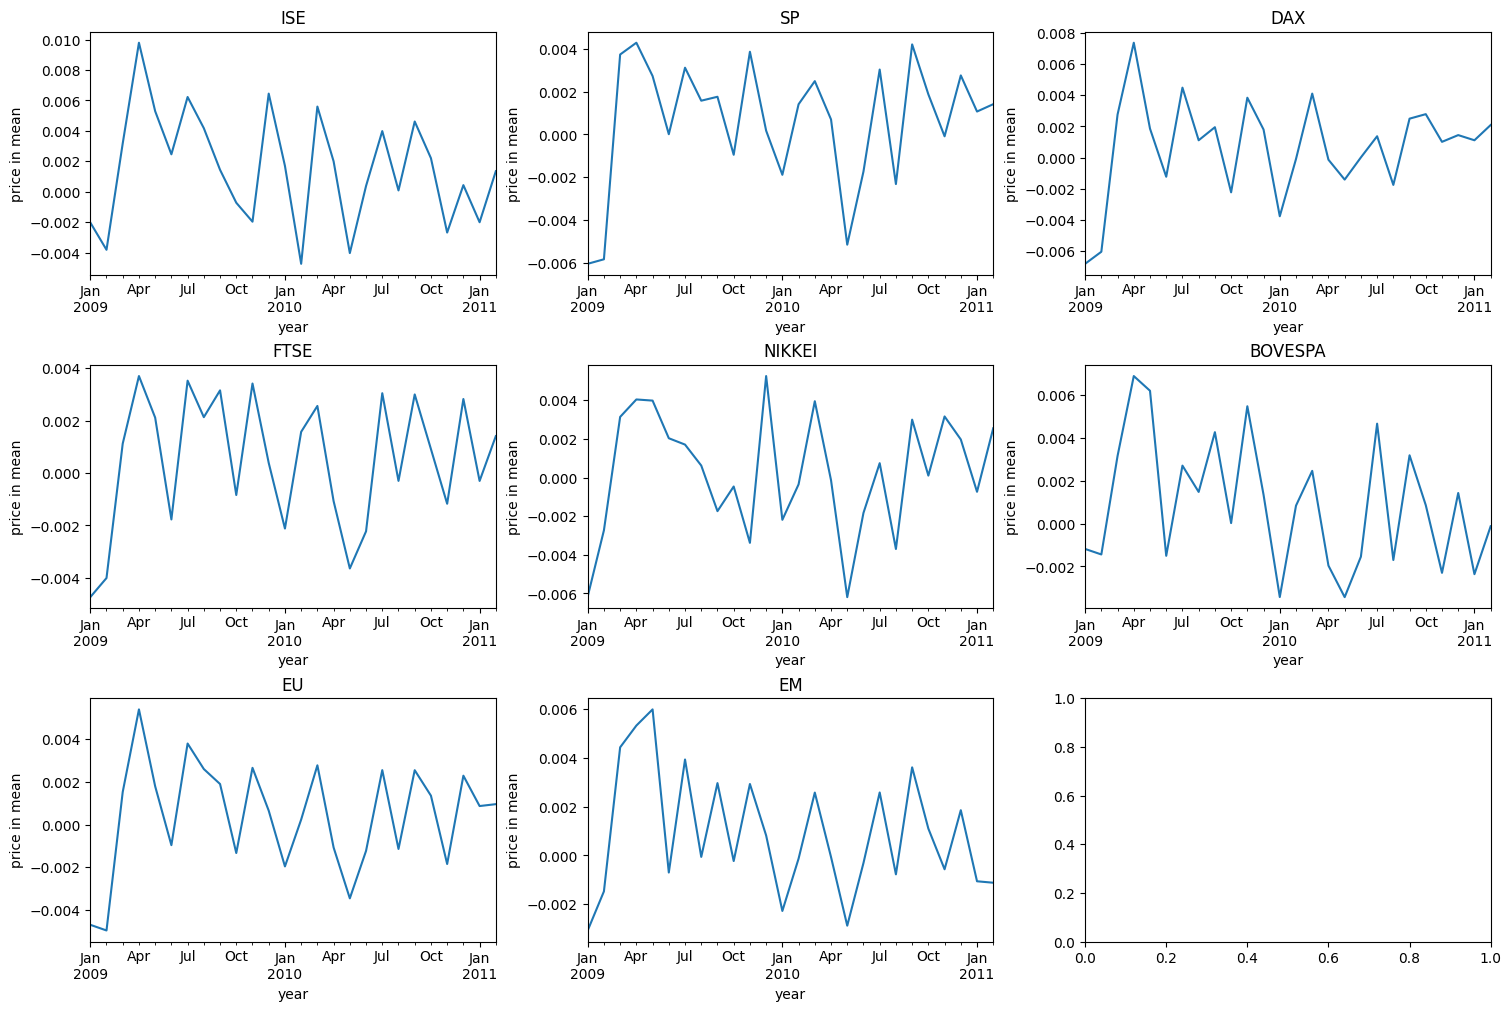

In [7]:
# Plot each column in the data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), constrained_layout=True)
data_columns = stock_mean_data.columns
for col, ax in enumerate(axes.flat):
    if col < len(data_columns):
        stock_mean_data[data_columns[col]].plot(ax=ax)
        ax.set_title(data_columns[col])
        ax.set_xlabel('year')
        ax.set_ylabel('price in mean')

plt.show()

In [8]:
# removing the duplicates in the columns from the dataset
print("Removinig the duplicate columns...!")
stock_data = stock_data.loc[:, ~stock_data.columns.duplicated()]
print(stock_data.head(),"\n \n")

Removinig the duplicate columns...!
                 ISE        SP       DAX      FTSE    NIKKEI   BOVESPA  \
date                                                                     
2009-01-05  0.035754 -0.004679  0.002193  0.003894  0.000000  0.031190   
2009-01-06  0.025426  0.007787  0.008455  0.012866  0.004162  0.018920   
2009-01-07 -0.028862 -0.030469 -0.017833 -0.028735  0.017293 -0.035899   
2009-01-08 -0.062208  0.003391 -0.011726 -0.000466 -0.040061  0.028283   
2009-01-09  0.009860 -0.021533 -0.019873 -0.012710 -0.004474 -0.009764   

                  EU        EM  
date                            
2009-01-05  0.012698  0.028524  
2009-01-06  0.011341  0.008773  
2009-01-07 -0.017073 -0.020015  
2009-01-08 -0.005561 -0.019424  
2009-01-09 -0.010989 -0.007802   
 



In [9]:
# Identify the key features and targeted feature

X_stock_key_features = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'] # These features are used to train the model
Y_stock_target = ['ISE'] # to predict the price using the model


In [21]:
x_train, x_test, y_train, y_test = train_test_split(stock_data[X_stock_key_features], + stock_data[Y_stock_target],
                                                    test_size=0.2, random_state=42)

len(x_train)

print(x_train)
# print(x_train)

                  SP       DAX      FTSE    NIKKEI   BOVESPA        EU  \
date                                                                     
2010-05-21  0.014913 -0.006605 -0.002013 -0.024808  0.034904 -0.000834   
2010-10-04 -0.008067 -0.012495 -0.006620 -0.002467  0.002219 -0.008419   
2010-09-03  0.013132  0.008310  0.010575  0.005643 -0.001933  0.009502   
2009-08-05 -0.002918 -0.011887 -0.005215 -0.011876  0.006155 -0.006187   
2009-10-07  0.002708 -0.002990 -0.005680  0.011061 -0.000527 -0.004043   
...              ...       ...       ...       ...       ...       ...   
2009-04-14 -0.020269  0.014565  0.000000 -0.009202 -0.012559  0.010411   
2009-06-05 -0.002518  0.002412  0.011716  0.010192 -0.002303  0.006255   
2010-02-01  0.014165  0.008113  0.011288  0.000684  0.017731  0.008520   
2010-09-27 -0.005684 -0.003087 -0.004493  0.013785  0.009050 -0.004654   
2009-06-01  0.025490  0.040020  0.019790  0.016172  0.023923  0.022989   

                  EM  
date          

In [11]:
# # check the data to be in 2d or 3d array
# def convert_to_2darray(data_array):
#   if data_array.ndim==1:
#     data_array=data_array.reshape(-1,1)
#     print("array convertes to :", data_array.ndim,"D")
#   else:
#     print("Didnt converted. Array is in ", data_array.ndim,"D")
#   return data_array

In [12]:
# # Convert the target data (y_train, y_test) to 2d array
# y_train = convert_to_2darray(y_train)
# y_test = convert_to_2darray(y_test)

# **Normalization**

In [22]:
# # normalize the data
# # converting the stock prices to binary values into 0,1

scaler_data =MinMaxScaler(feature_range=(0,1))

norm_x_train = scaler_data.fit_transform(x_train) # features variable
norm_x_test = scaler_data.transform(x_test)
norm_y_train = scaler_data.fit_transform(y_train) # targeted variable
norm_y_test = scaler_data.transform(y_test)

print(norm_x_train.shape)
print(norm_y_train.shape)
print(norm_x_test.shape)
print(norm_y_test.shape)

(428, 7)
(428, 1)
(108, 7)
(108, 1)


In [24]:
# # Reshaping the normalized data into array

norm_x_train = norm_x_train.reshape(-1,1)
norm_x_test = norm_x_test.reshape(-1,1)
norm_y_train = norm_y_train.reshape(-1,1)
norm_y_test = norm_y_test.reshape(-1,1)

print(norm_x_train.shape)  # Should output (428*7, 1)
print(norm_x_test.shape)   # Should output (428*7, 1)

print("x_train, x_test",norm_x_train.shape, norm_x_test.shape) # reshape output into (428*7, 1)
print("y_train, y_test",norm_y_train.shape, norm_y_test.shape)

(2996, 1)
(756, 1)
x_train, x_test (2996, 1) (756, 1)
y_train, y_test (2996, 1) (756, 1)


In [15]:
# # Reshape the input to 2D array to feed into the model
# allow_timestep =1
# norm_x_train = norm_x_train.reshape((norm_x_train.shape[0], allow_timestep, norm_x_train.shape[1]))
# norm_x_test = norm_x_test.reshape((norm_x_test.shape[0], allow_timestep, norm_x_test.shape[1]))
# # X_data.ndim

In [25]:
norm_x_train

array([[0.69891796],
       [0.4348226 ],
       [0.50222569],
       ...,
       [0.66109999],
       [0.61976336],
       [0.79360383]])

In [28]:
# Build the LSTM model from scratch
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(norm_x_train.shape[0], norm_x_train.shape[1]))) #layer 1 with 50 units
model.add(Dropout(0.2)) # prevent overfitting given 10% loss for every epoch
model.add(LSTM(units=100)) # layer 2 with 50 units will only return the last output seq
model.add(Dense(1)) # predicting only single values index(ISE) (predict single continuous value)


model.compile(loss='mean_squared_error', #calculate the error (pred & act)
              optimizer=Adam(learning_rate=0.001), #minimize the loss function.
              metrics=['mean_absolute_error']) # compiling the model
model.summary() # model summary


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 2996, 100)           │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2996, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# train the model
history = model.fit(norm_x_train, norm_y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0802 - mean_absolute_error: 0.2158 - val_loss: 0.0030 - val_mean_absolute_error: 0.0412
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0348 - val_loss: 1.5834e-04 - val_mean_absolute_error: 0.0066
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2125e-04 - mean_absolute_error: 0.0191 - val_loss: 9.0912e-05 - val_mean_absolute_error: 0.0056
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.2143e-04 - mean_absolute_error: 0.0183 - val_loss: 6.9373e-05 - val_mean_absolute_error: 0.0054
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.5968e-04 - mean_absolute_error: 0.0163 - val_loss: 1.3818e-04 - val_mean_absolute_error: 0.0109
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0711e-04 - mean_absolute_error: 0.0154 - val_loss: 3.5556e-05 - val_mean_absolute_error: 0.0031
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0

In [30]:
#Access the training data  to check the loss and MAE
training_hist = history.history

# evaluate model
train_loss, train_mean_absolute_error = model.evaluate(norm_x_test, norm_y_test)
print("\n")
print("training loss: ", train_loss)
print(f'Mean absolute error: {train_mean_absolute_error}')


#predict the model on test dataset
y_pred= model.predict(norm_x_test)

# print(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6865e-06 - mean_absolute_error: 0.0016


training loss:  3.07599157167715e-06
Mean absolute error: 0.0015194989973679185
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


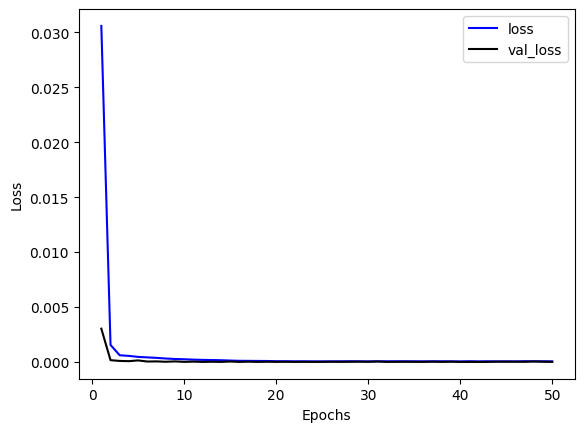

In [31]:
# visualize the training history
training_loss = training_hist['loss']
training_val_loss = training_hist['val_loss']
training_epochs = range(1, len(training_loss)+1)

plt.plot(training_epochs, training_loss, 'b', label='loss')
plt.plot(training_epochs, training_val_loss, 'black', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# # Inverse transform the predictions and actual values
# y_pred_inverse = scaler_data.inverse_transform(norm_y_pred)
# y_test_inverse = scaler_data.inverse_transform(norm_y_test)

# # Generate range for plotting
# train_range = range(len(y_train))
# test_range = range(len(y_train), len(y_train) + len(y_test))


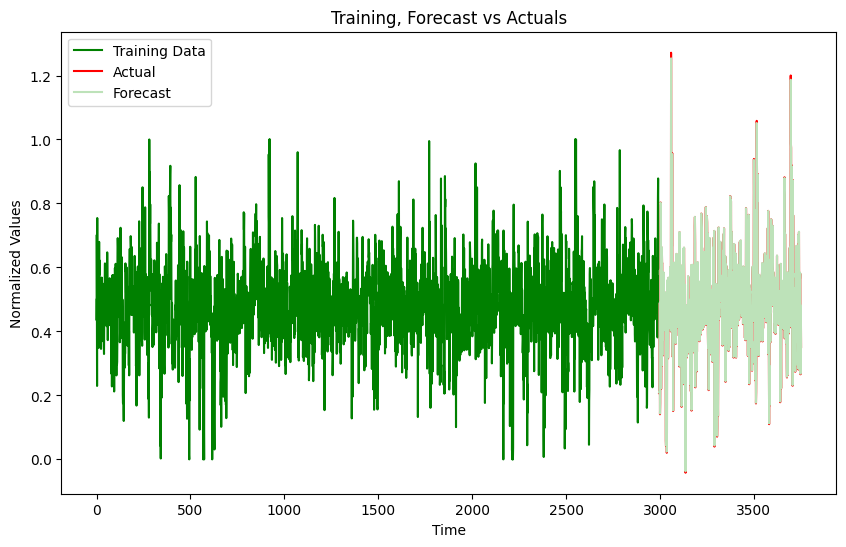

In [37]:
plt.figure(figsize=(10, 6))

# Plot the training data
plt.plot(range(len(norm_y_train)), norm_y_train, label='Training Data', color='green')

# Plot the actual values
plt.plot(range(len(norm_y_train), 3752), norm_y_test, label='Actual', color='red')

# Plot the forecasted values
plt.plot(range(len(norm_y_train), 3752), y_pred, label='Forecast', color='#BDE2B9')

# # Plot the confidence intervals
# plt.fill_between(range(len(norm_y_train), 3752),
#                  conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)

# Adding labels and title
plt.title('Training, Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Assuming forecast and norm_y_test are numpy arrays or pandas series
# If not, convert them to numpy arrays
y_pred = np.array(y_pred)
norm_y_test = np.array(norm_y_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(norm_y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(norm_y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(norm_y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Mean Absolute Error (MAE): 0.001519500360218178
Mean Squared Error (MSE): 3.0759997192384773e-06
Root Mean Squared Error (RMSE): 0.0017538528214301441
Mean Absolute Percentage Error (MAPE): 0.004410456848812946


**with feature extraction**

In [ ]:
stock_mean_data.head()

In [ ]:
corr_matrix = stock_mean_data.corr()

In [ ]:
corr_matrix

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot =  True, fmt = ".2f")
plt.show()

In [ ]:
stock_feature_extracted = stock_mean_data.drop(columns = ['FTSE','EU','EM'])

In [ ]:
stock_feature_extracted.head()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(stock_feature_extracted.corr(), annot =  True, fmt = ".2f")
plt.show()

In [ ]:
x = ['SP', 'DAX', 'NIKKEI', 'BOVESPA']
y = ['ISE']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(stock_mean_data[x], + stock_mean_data[y],
                                                    test_size=0.7, random_state=42)

In [ ]:
x_train.head()

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
# Convert the target data (y_train, y_test) to 2d array
y_train = convert_to_2darray(y_train)
y_test = convert_to_2darray(y_test)

In [ ]:
# # normalize the data
# # converting the stock prices to binary values into 0,1

scaler_data =MinMaxScaler(feature_range=(0,1))

norm_x_train = scaler_data.fit_transform(x_train) # features variable
norm_x_test = scaler_data.transform(x_test)
norm_y_train = scaler_data.fit_transform(y_train) # targeted variable
norm_y_test = scaler_data.transform(y_test)

In [ ]:
# Reshape the input to 2D array to feed into the model
allow_timestep =1
norm_x_train = norm_x_train.reshape((norm_x_train.shape[0], allow_timestep, norm_x_train.shape[1]))
norm_x_test = norm_x_test.reshape((norm_x_test.shape[0], allow_timestep, norm_x_test.shape[1]))
# X_data.ndim

In [ ]:
# Build the LSTM model from scratch
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(norm_x_train.shape[1], norm_x_train.shape[2]))) #layer 1 with 50 units
model.add(Dropout(0.2)) # prevent overfitting given 10% loss for every epoch
model.add(LSTM(units=100)) # layer 2 with 50 units will only return the last output seq
model.add(Dense(1)) # predicting only single values index(ISE) (predict single continuous value)


model.compile(loss='mean_squared_error', #calculate the error (pred & act)
              optimizer=Adam(learning_rate=0.001), #minimize the loss function.
              metrics=['mean_absolute_error']) # compiling the model
model.summary() # model summary

In [ ]:
# train the model
history = model.fit(norm_x_train, norm_y_train, epochs=50, batch_size=16, validation_split=0.2)


In [ ]:
#Access the training data  to check the loss and MAE
training_hist = history.history

# evaluate model
train_loss, train_mean_absolute_error = model.evaluate(norm_x_test, norm_y_test)
print("\n")
print("training loss: ", train_loss)
print(f'Mean absolute error: {train_mean_absolute_error}')


#predict the model on test dataset
y_pred= model.predict(norm_x_test)

# print(y_pred)

In [ ]:
# visualize the training history
training_loss = training_hist['loss']
training_val_loss = training_hist['val_loss']
training_epochs = range(1, len(training_loss)+1)

plt.plot(training_epochs, training_loss, 'b', label='loss')
plt.plot(training_epochs, training_val_loss, 'black', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# convert the y_prediction to 2d array to be in same path
norm_y_pred = convert_to_2darray(y_pred)

In [ ]:
# Inverse transform the predictions and actual values
y_pred_inverse = scaler_data.inverse_transform(norm_y_pred)
y_test_inverse = scaler_data.inverse_transform(norm_y_test)

# Generate range for plotting
train_range = range(len(y_train))
test_range = range(len(y_train), len(y_train) + len(y_test))


In [ ]:
# Plotting the actual vs predicted values
plt.figure(figsize=(7, 7))

# Plot training data
plt.plot(train_range, y_train, label='Training Data', color='blue')

# Plot test data
plt.plot(test_range, y_test_inverse, label='Actual Test Data', color='green')

# Plot predicted data
plt.plot(test_range, y_pred_inverse, label='Predicted Test Data', color='red')

plt.title('Stock Market Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
lstm_mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f'Test Mean Absolute Error for ARIMA: {lstm_mae}')

In [ ]:
# Calculate MSE and RMSE
mse_lstm = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse_lstm = np.sqrt(mse_lstm)
print(f'Test Mean Squared Error for LSTM: {mse_lstm}')
print(f'Test Root Mean Squared Error for LSTM: {rmse_lstm}')

# Calculate the mean of the true values
mean_y_test = np.mean(y_test_inverse)

# Calculate percentage errors
percentage_mse_lstm = (mse_lstm / mean_y_test) * 100
percentage_rmse_lstm = (rmse_lstm / mean_y_test) * 100
print(f'Test Mean Squared Error for LSTM (Percentage): {percentage_mse_lstm}%')
print(f'Test Root Mean Squared Error for LSTM (Percentage): {percentage_rmse_lstm}%')


## Implementing ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# check the data to be in stationary before applying differencing to the dataset

x_train, x_test, y_train, y_test = train_test_split(stock_mean_data[X_stock_key_features], + stock_mean_data[Y_stock_target],
                                                    test_size=0.7, random_state=42)




In [ ]:
y_train

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

In [ ]:
# Fit the ARIMA model with auto_arima for optimal parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                   max_p=5, max_q=5, seasonal=False,
                   trace=True, error_action='ignore',
                   suppress_warnings=True, stepwise=True)

In [ ]:
# Train the model on the training set
model.fit(y_train)

In [ ]:
# Forecast the data
n_periods = len(y_test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
# forecast

In [ ]:
# Ensure that the forecast data has the same index as y_test
forecast_series = pd.Series(forecast)
forecast_series

In [ ]:
# Convert the forecast to a pandas series with the corresponding dates
forecast_series = pd.Series(forecast, index=y_test.index)
forecast